In [ ]:
!pip install kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aryarishabh/hand-gesture-recognition-dataset
!unzip /content/hand-gesture-recognition-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
 91% 34.0M/37.6M [00:00<00:00, 93.2MB/s]
100% 37.6M/37.6M [00:00<00:00, 94.8MB/s]


In [1]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
   creating: data/train/
   creating: data/train/neutral/
  inflating: data/train/neutral/hand_new67.png  
  inflating: data/train/neutral/hand_12 (1).png  
  inflating: data/train/neutral/hand_13 (1).png  
  inflating: data/train/neutral/hand_14 (1).png  
  inflating: data/train/neutral/hand_15 (1).png  
  inflating: data/train/neutral/hand_16 (1).png  
  inflating: data/train/neutral/hand_17 (1).png  
  inflating: data/train/neutral/hand_18 (1).png  
  inflating: data/train/neutral/hand_19 (1).png  
  inflating: data/train/neutral/hand_20 (1).png  
  inflating: data/train/neutral/hand_21.png  
  inflating: data/train/neutral/hand_22 (1).png  
  inflating: data/train/neutral/hand_23 (1).png  
  inflating: data/train/neutral/hand_24 (1).png  
  inflating: data/train/neutral/hand_25 (1).png  
  inflating: data/train/neutral/hand_26 (1).png  
  inflating: data/train/neutral/hand_27 (1).png  
  inflating: data/train/neutral/hand_29 (1).png  


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt

In [3]:
batch_size = 32
img_height = 100
img_width = 100

In [4]:
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (50, 50))
            images.append(img)
            labels.append(label)
    return images, labels

categories = {
    "down": 0,
    "neutral": 1,
    "up": 2,
    "other": 3
}


X = []
y = []

for category, label in categories.items():
    folder_path = os.path.join("data/train/", category)
    images, labels = load_images_from_folder(folder_path, label)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# # Normalize the images to values between 0 and 1
X = X.astype("float32") / 255.0
X

array([[[[0.13333334, 0.8784314 , 0.14117648],
         [0.2627451 , 0.7529412 , 0.2784314 ],
         [0.2627451 , 0.75686276, 0.27450982],
         ...,
         [0.23529412, 0.7529412 , 0.30588236],
         [0.23137255, 0.77254903, 0.31764707],
         [0.1764706 , 0.72156864, 0.26666668]],

        [[0.2627451 , 0.7647059 , 0.2784314 ],
         [0.5254902 , 0.5137255 , 0.54509807],
         [0.53333336, 0.5254902 , 0.54901963],
         ...,
         [0.4627451 , 0.52156866, 0.5803922 ],
         [0.4509804 , 0.5568628 , 0.62352943],
         [0.27058825, 0.32941177, 0.4392157 ]],

        [[0.26666668, 0.7607843 , 0.27450982],
         [0.53333336, 0.50980395, 0.5411765 ],
         [0.53333336, 0.5254902 , 0.54509807],
         ...,
         [0.45490196, 0.47843137, 0.49019608],
         [0.46666667, 0.46666667, 0.49411765],
         [0.23137255, 0.27058825, 0.34117648]],

        ...,

        [[0.23921569, 0.7372549 , 0.23921569],
         [0.47843137, 0.47058824, 0.48235294]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = utils.to_categorical(y_train, len(categories))
y_test = utils.to_categorical(y_test, len(categories))

# Step 2: Create the deep learning model for gesture detection

def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Define the input shape and number of classes (gestures)
input_shape = X_train[0].shape
num_classes = len(categories)

# Create the model
model = create_model(input_shape, num_classes)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
17/17 [==============================] - 6s 275ms/step - loss: 1.3332 - accuracy: 0.3614 - val_loss: 1.2969 - val_accuracy: 0.1567
Epoch 2/20
17/17 [==============================] - 3s 154ms/step - loss: 1.0351 - accuracy: 0.5225 - val_loss: 0.7612 - val_accuracy: 0.6791
Epoch 3/20
17/17 [==============================] - 3s 159ms/step - loss: 0.8628 - accuracy: 0.5487 - val_loss: 0.7230 - val_accuracy: 0.6716
Epoch 4/20
17/17 [==============================] - 3s 159ms/step - loss: 0.7241 - accuracy: 0.6798 - val_loss: 0.6184 - val_accuracy: 0.7015
Epoch 5/20
17/17 [==============================] - 4s 224ms/step - loss: 0.6808 - accuracy: 0.6948 - val_loss: 0.6186 - val_accuracy: 0.7164
Epoch 6/20
17/17 [==============================] - 3s 163ms/step - loss: 0.6230 - accuracy: 0.7285 - val_loss: 0.6083 - val_accuracy: 0.7239
Epoch 7/20
17/17 [==============================] - 3s 160ms/step - loss: 0.5934 - accuracy: 0.7397 - val_loss: 0.4967 - val_accuracy: 0.7388
Epoch 

In [6]:
# Load and preprocess the test dataset

X_test = []
y_test = []

for category, label in categories.items():
    folder_path = os.path.join("data/test/", category)
    images, labels = load_images_from_folder(folder_path, label)
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test.astype("float32") / 255.0

y_test = utils.to_categorical(y_test, len(categories))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


10/10 [==============================] - 0s 35ms/step - loss: 0.6697 - accuracy: 0.9113
Test loss: 0.6697236895561218
Test accuracy: 0.9112628102302551


In [7]:
from tensorflow.keras.models import save_model, load_model

# Save the trained model
model.save("gesture_detection_model.h5")

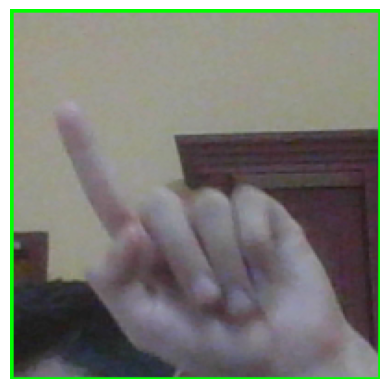

1/1 [==============================] - 0s 319ms/step
[[1.1972260e-03 1.5342442e-02 9.8345941e-01 9.8049156e-07]]
Predicted gesture label with the second largest probability: neutral


In [10]:
image_path = "hand_62.png"  # Make sure this is the correct path to your image
img = cv2.imread(image_path)

# Convert BGR to RGB for correct colors
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")  # Hide the axis ticks and labels
plt.show()

img = cv2.resize(img, (50, 50))
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the image using the pre-trained model (assuming 'model' is defined)
predicted_probabilities = model.predict(img)
print(predicted_probabilities)

# Get the index of the second largest probability
second_largest_index = np.argsort(predicted_probabilities[0])[-2]

# Get the label from the categories dictionary (assuming 'categories' is defined)
gesture_label = None
for label, value in categories.items():
    if value == second_largest_index:
        gesture_label = label
        break

print("Predicted gesture label with the second largest probability:", gesture_label)


In [ ]:
# # Load the saved model
# loaded_model = load_model("gesture_detection_model.h5")